<a href="https://colab.research.google.com/github/MOsamaAS/CodexCue/blob/main/Hyperparameter%20Tuning%20of%20ML%20Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Best Parameters from Grid Search: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Grid Search Accuracy: 1.0
Classification Report from Grid Search:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Best Parameters from Random Search: {'kernel': 'linear', 'gamma': 'scale', 'degree': 4, 'C': 1}
Random Search Accuracy: 1.0
Classification Report from Random Search:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00 

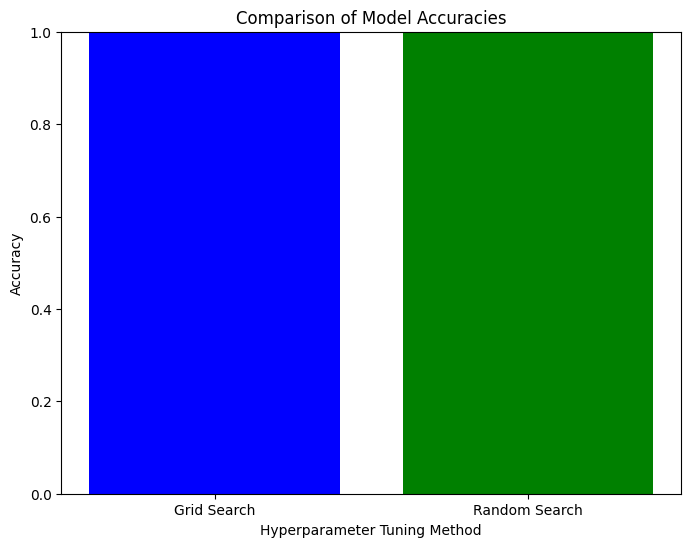

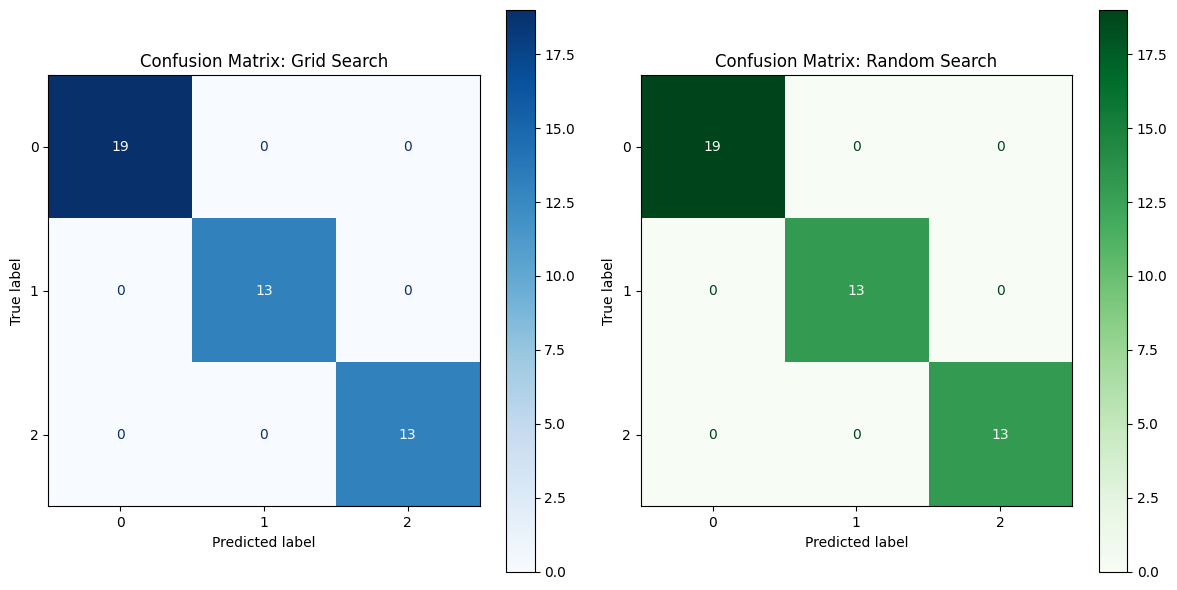

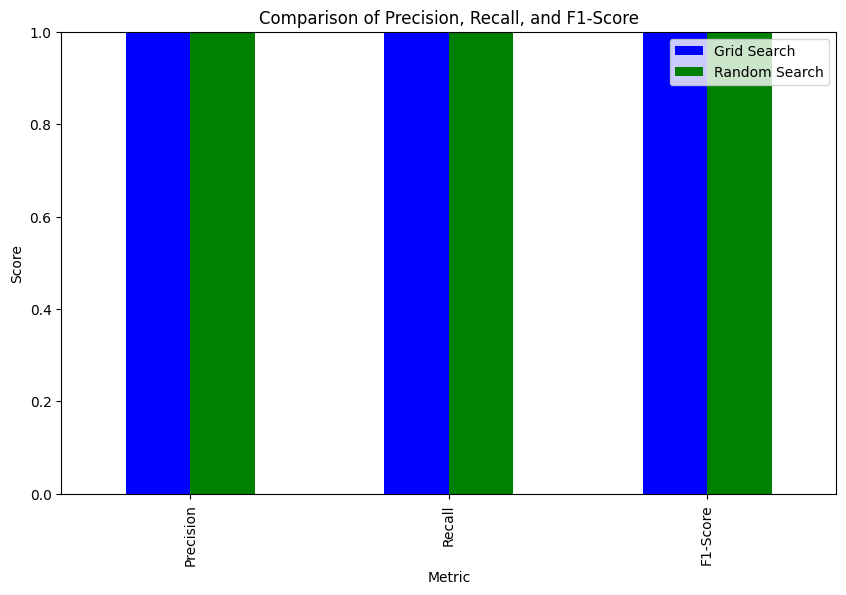

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load dataset (using Iris dataset as an example)
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the SVM model
model = SVC()

# Grid Search: Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Implement GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters from Grid Search
best_params_grid = grid_search.best_params_
print(f"Best Parameters from Grid Search: {best_params_grid}")

# Make predictions using the best model from Grid Search
y_pred_grid = grid_search.predict(X_test)

# Evaluate the model's performance
accuracy_grid = accuracy_score(y_test, y_pred_grid)
report_grid = classification_report(y_test, y_pred_grid)
print(f"Grid Search Accuracy: {accuracy_grid}")
print(f"Classification Report from Grid Search:\n{report_grid}")

# Random Search: Define the parameter distribution
param_dist = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],
    'degree': [3, 4, 5]  # Only relevant for polynomial kernel
}

# Implement RandomizedSearchCV
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

# Get the best parameters from Random Search
best_params_random = random_search.best_params_
print(f"Best Parameters from Random Search: {best_params_random}")

# Make predictions using the best model from Random Search
y_pred_random = random_search.predict(X_test)

# Evaluate the model's performance
accuracy_random = accuracy_score(y_test, y_pred_random)
report_random = classification_report(y_test, y_pred_random)
print(f"Random Search Accuracy: {accuracy_random}")
print(f"Classification Report from Random Search:\n{report_random}")

import matplotlib.pyplot as plt

# Accuracy values
accuracies = [accuracy_grid, accuracy_random]
methods = ['Grid Search', 'Random Search']

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(methods, accuracies, color=['blue', 'green'])
plt.ylim(0, 1)  # Set the y-axis range from 0 to 1
plt.xlabel('Hyperparameter Tuning Method')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.show()

from sklearn.metrics import ConfusionMatrixDisplay

# Create a figure with a specific size
plt.figure(figsize=(12, 6))

# Plot confusion matrix for Grid Search
ax1 = plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
ConfusionMatrixDisplay.from_estimator(grid_search, X_test, y_test, cmap=plt.cm.Blues, ax=ax1)
ax1.set_title('Confusion Matrix: Grid Search')

# Plot confusion matrix for Random Search
ax2 = plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
ConfusionMatrixDisplay.from_estimator(random_search, X_test, y_test, cmap=plt.cm.Greens, ax=ax2)
ax2.set_title('Confusion Matrix: Random Search')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

from sklearn.metrics import precision_recall_fscore_support

# Get precision, recall, f1-score for each model
metrics_grid = precision_recall_fscore_support(y_test, y_pred_grid, average='weighted')
metrics_random = precision_recall_fscore_support(y_test, y_pred_random, average='weighted')

# Create a dataframe for easy plotting
import pandas as pd

metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score'],
    'Grid Search': metrics_grid[:-1],  # Exclude support
    'Random Search': metrics_random[:-1]
})

# Plot the comparison
metrics_df.plot(x='Metric', kind='bar', figsize=(10, 6), color=['blue', 'green'])
plt.title('Comparison of Precision, Recall, and F1-Score')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()